In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_31_05_2022_06_13_24.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
evaluation_data.tail(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
890,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_8,184,184,9,29.946315,4935,184,NaN,NaN,11.0,182.0,0.0,0.0,1.0,0,0,0.0
891,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,1,38.718474,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
892,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,2,38.564617,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
893,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,3,38.583182,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
894,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,4,39.469549,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
895,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,5,38.584078,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
896,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,6,38.266236,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
897,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,7,38.225536,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
898,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,8,38.532325,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0
899,QuantNaryTreeLearner,random_PDFA_nominal_size_200_2_9,208,207,9,38.586608,5505,207,NaN,NaN,10.0,205.0,0.0,0.0,1.0,0,0,0.0


In [5]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [6]:
evaluation_data['DISTRIBUTIONS'] = evaluation_data['Instance'].str.split('_').str[5]
evaluation_data['DISTRIBUTIONS']  = pd.to_numeric(evaluation_data['DISTRIBUTIONS'] )

In [7]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'DISTRIBUTIONS']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs, 'Tree Depth':funcs })
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR', 'TreeDepth_median', 'TreeDepth_IQR']
grouped_multiple.reset_index(inplace = True)

In [8]:
grouped_multiple

,Algorithm,DISTRIBUTIONS,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR,TreeDepth_median,TreeDepth_IQR
0,QuantNaryTreeLearner,2,35.334334,5.200686,5401.5,480.0,200.5,17.0,0.0,0.0,...,0.0,0.0,200.5,17.0,399.0,34.0,0.0,0.0,10.0,1.0
1,QuantNaryTreeLearner,4,13.913638,1.827130,3280.5,375.0,118.5,9.0,0.0,0.0,...,0.0,0.0,193.0,16.0,314.0,20.0,0.0,0.0,6.0,0.0
2,QuantNaryTreeLearner,6,11.020423,3.205739,2940.0,399.0,102.0,10.0,0.0,0.0,...,0.0,0.0,200.5,22.0,301.0,34.0,0.0,0.0,5.0,0.0
3,QuantNaryTreeLearner,8,9.410671,1.544863,2691.0,216.0,92.0,10.0,0.0,0.0,...,0.0,0.0,201.0,12.0,294.0,25.0,0.0,0.0,5.0,0.0
4,QuantNaryTreeLearner,10,8.461094,1.234755,2527.5,45.0,85.5,9.0,0.0,0.0,...,0.0,0.0,202.5,4.0,286.5,12.0,0.0,0.0,4.5,1.0
5,WLStarLearner,2,23.077364,5.816354,7525.5,894.0,11.0,1.0,0.0,0.0,...,0.0,0.0,200.5,17.0,7534.5,894.0,0.0,0.0,NaN,NaN
6,WLStarLearner,4,20.106580,6.611684,4325.5,706.0,8.0,2.0,0.0,0.0,...,0.0,0.0,193.0,16.0,4334.5,706.0,0.0,0.0,NaN,NaN
7,WLStarLearner,6,23.711702,10.098903,3816.5,819.0,7.0,2.0,0.0,0.0,...,0.0,0.0,200.5,22.0,3825.5,819.0,0.0,0.0,NaN,NaN
8,WLStarLearner,8,23.435211,4.597420,3383.0,609.0,6.0,0.0,0.0,0.0,...,0.0,0.0,201.0,12.0,3392.0,609.0,0.0,0.0,NaN,NaN
9,WLStarLearner,10,23.872483,8.077838,3195.5,435.0,5.5,1.0,0.0,0.0,...,0.0,0.0,202.5,4.0,3204.5,435.0,0.0,0.0,NaN,NaN


In [9]:
len(grouped_multiple)

10

Text(0, 0.5, 'Learning Time Median (s)')

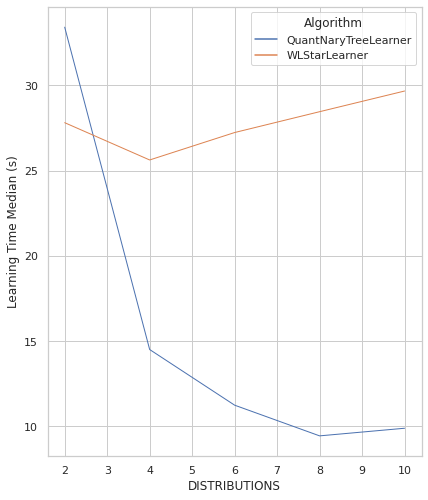

In [34]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
#plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

/opt/conda/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


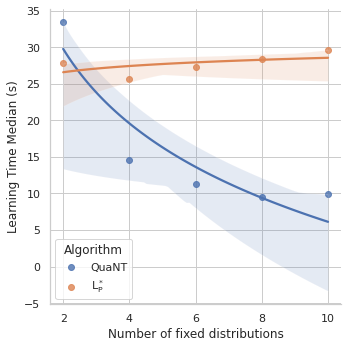

In [44]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="DISTRIBUTIONS", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, logx = True)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Number of fixed distributions", fontsize = 12)
ax.axes[0,0].set_ylabel("Learning Time Median (s)", fontsize = 12)
new_labels = ["QuaNT","$\mathrm{L_{P}^*}$"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

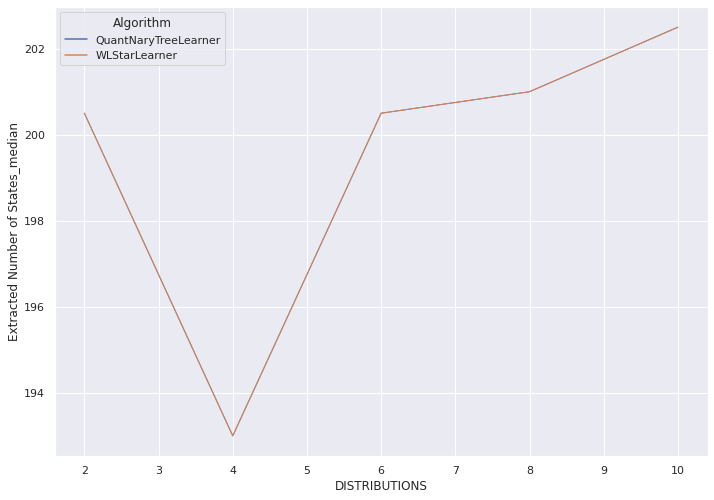

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="DISTRIBUTIONS", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

Text(0, 0.5, 'Speedup')

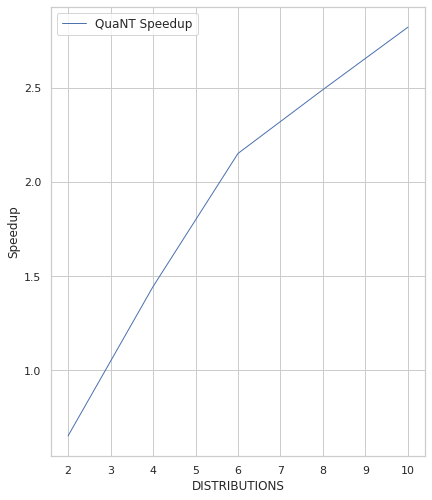

In [20]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:5])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][5:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_multiple['DISTRIBUTIONS'][0:5], y=speedup_Q_WL,  linewidth=1)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

Text(0, 0.5, 'Structure Size Median')

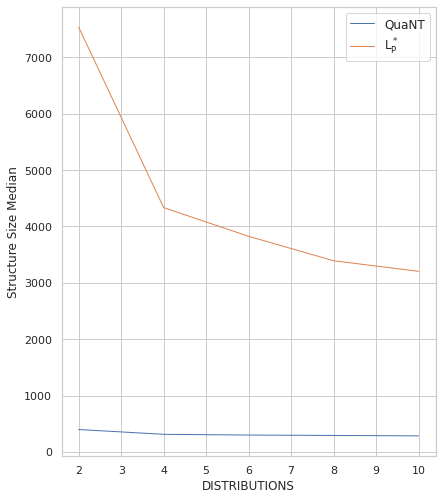

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)

# Tree Depth Analysis

In [15]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time (s)', 'LastTokenQuery',
       'EquivalenceQuery', 'OT Prefixes', 'OT Suffixes', 'Tree Depth',
       'Inner Nodes', 'LogProbError', 'WER', 'NDCG', 'OOPartition',
       'OOTolerance', 'AbsoluteError', 'OT_SIZE', 'TREE_SIZE',
       'STRUCTURE_SIZE', 'DISTRIBUTIONS'],
      dtype='object')

In [16]:
evaluation_data_Quant['Tree Depth'].value_counts()

5.0     189
6.0      99
4.0      63
10.0     54
11.0     36
7.0       9
Name: Tree Depth, dtype: int64

Text(0, 0.5, 'Tree Depth')

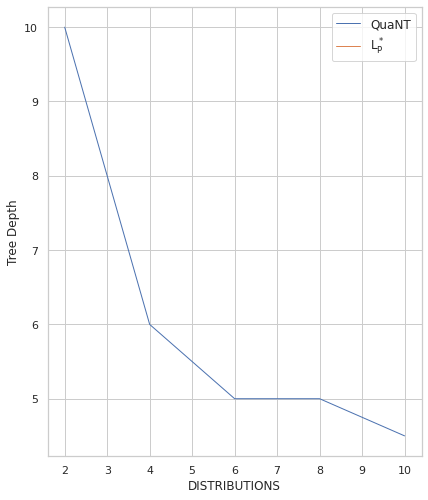

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="TreeDepth_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)